In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print(f'Found GPU at {device_name}')

Found GPU at /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


Training data shape: ((50000, 32, 32, 3), (50000, 1))
Test data shape:((10000, 32, 32, 3), (10000, 1))
Total number of outputs:10
Output classes:[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

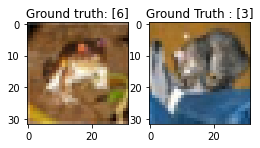

In [6]:
print(f'Training data shape: {train_images.shape, train_labels.shape}')
print(f'Test data shape:{test_images.shape, test_labels.shape}')

classes = np.unique(train_labels)
nClasses = len(classes)

print(f'Total number of outputs:{nClasses}')
print(f'Output classes:{classes}')

plt.figure(figsize = [4,2])

plt.subplot(121)
plt.imshow(train_images[0, :, :, :], cmap = 'gray')
plt.title(f"Ground truth: {train_labels[0]}")

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [7]:
input_shape = (nRows, nCols, nDims) = train_images.shape[1: ]
train_data = train_images.astype('float32')
test_data = test_images.astype('float32')

In [8]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
print('original label 0:', train_labels[0])
print('One hot encoding label:', train_labels_one_hot[0])

original label 0: [6]
One hot encoding label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
def createModel():
  model = Sequential()

  model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = input_shape))
  print('hello')
  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation = 'softmax'))

  return model

In [11]:
model1 = createModel()
batch_size = 256
epochs = 10
model1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hello


In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [13]:
history = model1.fit(train_data, train_labels_one_hot, batch_size = batch_size, epochs = epochs, verbose = 1,
                     validation_data = (test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/10
196/196 [==============================] - 17s 26ms/step - loss: 2.0562 - accuracy: 0.2438 - val_loss: 1.7542 - val_accuracy: 0.3788
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 1.7100 - accuracy: 0.3810 - val_loss: 1.6235 - val_accuracy: 0.4224
Epoch 3/10
196/196 [==============================] - 4s 21ms/step - loss: 1.5282 - accuracy: 0.4506 - val_loss: 1.4361 - val_accuracy: 0.4873
Epoch 4/10
196/196 [==============================] - 4s 23ms/step - loss: 1.3926 - accuracy: 0.5005 - val_loss: 1.3121 - val_accuracy: 0.5186
Epoch 5/10
196/196 [==============================] - 4s 23ms/step - loss: 1.2873 - accuracy: 0.5403 - val_loss: 1.1351 - val_accuracy: 0.5992
Epoch 6/10
196/196 [==============================] - 4s 23ms/step - loss: 1.1914 - accuracy: 0.5772 - val_loss: 1.1621 - val_accuracy: 0.5836
Epoch 7/10
196/196 [==============================] - 4s 21ms/step - loss: 1.1115 - accuracy: 0.6064 - val_loss: 1.1236 - val_accuracy: 0.608

[1.3118633031845093, 0.5680999755859375]

Text(0.5, 1.0, 'Loss Curves')

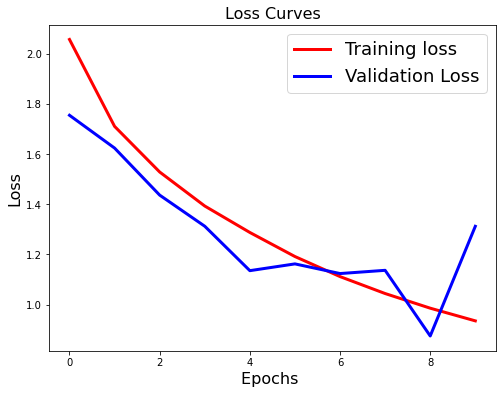

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

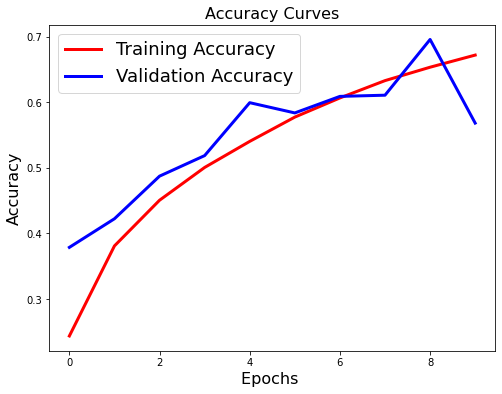

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)